# **XGBoost**

### Group Name: BYD2060

### Link to the github repo: https://github.com/Yangxinyee/XGboost_for_BYD

# Overview of XGBoost

XGBoost, or Extreme Gradient Boosting, is an efficient, scalable machine learning algorithm used primarily for supervised learning tasks like classification and regression. It builds upon gradient boosting principles to create an ensemble of weak learners that sequentially correct the errors of previous models to improve accuracy.

## How XGBoost Works

1. **Initialization**:
   - Starts with an initial prediction (average value for regression or a default probability for classification).

2. **Iterative Model Training**:
   - In each step, a new weak learner (we are using decision tree) is trained to minimize residual errors from previous models. 
   - The weak learner is trained on a modified dataset where the target is now the residual error from the last iteration.

3. **Gradient Boosting with Regularization**:
   
   - XGBoost includes regularization terms in the objective function to control overfitting:
     $$
     \text{Objective} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
     $$
     where $L(y_i, \hat{y}_i)$ is the loss function, $\Omega(f_k)$ is the regularization term for tree $f_k$, $n$ is the numble of samples, and $k$ is the number of trees (Chen & Guestrin, 2016). 
   
4. **Shrinking (Learning Rate)**:
   - Applies a learning rate to scale each weak learner’s contribution, ensuring gradual model improvement to prevent overfitting.
   
5. **Tree Pruning**:
   - Uses constraints like "max depth" to limit tree depth, preventing overfitting.
   
6. **Weighted Data and Column Sampling**:
   - Row and column sampling prevent overfitting, making the model more robust to noisy data.
   
7. **Final Prediction**:
   - Predictions are generated by aggregating the outputs of all weak learners, often by summing their outputs.

## Advantages of XGBoost

1. **Highly Efficient and Scalable**:
   - Optimized for speed, utilizing CPU/GPU resources for large datasets.

2. **Regularization**:
   - L1 and L2 regularization helps reduce overfitting, improving generalization (Friedman, 2001).

3. **Custom Loss Functions**:
   - Allows custom loss functions, adapting well to various tasks and metrics.

4. **Handles Missing Values**:
   - Automatically learns the best direction for missing values during training.

5. **Parallel and Distributed Computing**:
   - Supports parallel tree boosting, and distributed training, making it suitable for very large datasets.

6. **Feature Importance and Interpretability**:
   - Provides feature importance scores for insight into feature contributions.

## Disadvantages of XGBoost

1. **Complexity in Tuning**:
   - Many hyperparameters require tuning; poor parameter settings may lead to suboptimal performance.

2. **Sensitive to Noise**:
   - Can overfit noisy data or when trees are too deep, despite regularization.

3. **High Memory Consumption**:
   - Memory-intensive on large datasets with high-dimensional data.

4. **Not Ideal for Small Datasets**:
   - On small datasets, simpler models may perform better with fewer resources.

5. **Black-box Nature**:
   - Though feature importance scores provide some interpretability, XGBoost can still be difficult to fully interpret.


## Representation of XGBoost

In XGBoost with Decision Tree as the weak learner, predictions are made by combining the outputs of a sequence of decision trees. Here’s how XGBoost generates a single prediction from feature values:

1. **Initialization**:

   - The model starts with an initial prediction for all samples, often set to zero or the average target value if it's a regression task. Let's denote this initial prediction as $F^{(0)}(x)$.

2. **Training Decision Trees**:

   - In each boosting round $t$, a new Decision Tree $f_t(x)$ is trained to predict the residuals (the difference between the true values $y_i$ and the current predictions $F^{(t-1)}(x_i)$.
   - At each split, the Decision Tree splits the data based on a single feature and threshold, recursively creating a set of rules. The final prediction for each sample is determined by the leaf node it falls into after traversing the tree.

3. **Tree Prediction**:

   - For a feature $x$ and a threshold $\theta$, a single split in the Decision Tree assigns predictions to samples based on the threshold: 
     $$
     f_t(x) = \begin{cases} 
           y_{\text{left}} & \text{if } x_i < \theta \\
           y_{\text{right}} & \text{otherwise}
        \end{cases}
     $$

   - Here, $y_{\text{left}}$ and $y_{\text{right}}$ represent the predicted values for the samples on each side of the split. These predictions are often chosen to minimize the overall error in the objective function (Hastie, Tibshirani & Friedman, 2009).

4. **Updating the Overall Prediction**:

   - The model’s prediction is updated by adding a scaled version of the Decision Tree’s prediction. The learning rate $\eta$ controls how much each tree contributes to the final model: 
     $$
     F^{(t)}(x) = F^{(t-1)}(x) + \eta f_t(x)
     $$

   - This update means each Decision Tree contributes only a small correction to the existing prediction, allowing the model to make gradual adjustments rather than large changes.

5. **Final Prediction**:

   - After $T$ boosting rounds, the final prediction for a data point $x$ is the sum of all weak learners' contributions: 
     $$
     F(x) = \sum_{t=1}^T \eta f_t(x)
     $$

   - Each Decision Tree captures patterns by recursively splitting data based on features and thresholds. By combining multiple trees, XGBoost can approximate complex relationships in the data (Chen & Guestrin, 2016).

## Loss of XGBoost

The loss is used to measure the error between predicted and actual values. XGBoost supports various loss functions tailored to different types of tasks, including regression and classification tasks.

**Loss Function**:

For the regression task, we can use Mean Squared Error(MSE) or Mean Absolute Error (MAE) (Hastie, Tibshirani & Friedman, 2009)

Mean Squared Error(MSE):
$$
    L(F^{\mathbf{(t)}}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - F^{\mathbf{(t)}}(\mathbf{x}_i))^2
$$

Mean Absolute Error (MAE):
$$
    L(F^{\mathbf{(t)}}) = \frac{1}{n} \sum_{i=1}^{n} |y_i - F^{\mathbf{(t)}}(\mathbf{x}_i)|
$$

For the binary classification task, we can use Binary Cross Entropy Loss
Binary Cross Entropy Loss:

$$
L_S(F^{\mathbf{(t)}}) = -\frac{1}{n} \sum_{i=1}^{n}\left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - F^{\mathbf{(t)}}(\mathbf{x}_i)) \right]
$$

For the multiclass classification task, we can use Cross Entropy Loss
Cross Entropy Loss (Bishop, 2006):
$$
    L_S(F^{\mathbf{(t)}}) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k} \mathbb{1}[y_i = j] \log F^{\mathbf{(t)}}(\mathbf{x}_i)_j
$$

where:

- $y_i$ is the $i$-th actual value 

- $n$ is the number of samples 

- $k$ is the number of classes 

- $j$ is the $j$-th class 

- $F^{\mathbf{(t)}}$ is the model at the $t$-th iteration.

## XGBoost with Decision Tree as Weak Learner: Optimizer Update

In this configuration, XGBoost uses a decision tree as the weak learner. The optimizer is updated to account for the decision tree mechanism, which recursively splits the data based on features and thresholds. Each leaf node assigns a constant value to the samples it contains. The prediction update process incorporates a learning rate $\eta$ to scale the contribution of each tree, ensuring gradual and controlled adjustments to the model (Quinlan, 1996).

### Objective Function

The objective function consists of the loss and regularization terms:

$$
\text{Objective} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

where $L(y_i, \hat{y}_i)$ is the loss function, typically squared error or logistic loss, measuring the difference between the true values $y_i$ and predictions $\hat{y}_i$. $\Omega(f_k)$ is the regularization term to control model complexity.

At each iteration $t$, the model updates the prediction with the new decision tree’s prediction, scaled by the learning rate $\eta$:

$$
F^{(t)}(x) = F^{(t-1)}(x) + \eta f_t(x)
$$

where $f_t(x)$ represents the decision tree’s prediction.

### Weak Learner

For a feature $x$ and a threshold $\theta$, a single split in the Decision Tree assigns predictions to samples based on the threshold: 
     $$
     f_t(x) = \begin{cases} 
           y_{\text{left}} & \text{if } x_i < \theta \\
           y_{\text{right}} & \text{otherwise}
        \end{cases}
     $$

Here, $y_{\text{left}}$ and $y_{\text{right}}$ represent the predicted values for the samples on each side of the split. These predictions are often chosen to minimize the overall error in the objective function.

### Approximation with Taylor Expansion

To facilitate optimization, we apply a second-order Taylor expansion around the current prediction $F^{(t-1)}$ to approximate the loss function $L(F^{(t)})$:

$$
L(F^{(t)}) \approx \sum_{i=1}^{n} \left[ L(y_i, F^{(t-1)}(x_i)) + g_i f_t(x_i) + \frac{1}{2} h_i f_t(x_i)^2 \right] + \Omega(f_t)
$$

where:
- $g_i = \frac{\partial L(y_i, F^{(t-1)}(x_i))}{\partial F^{(t-1)}(x_i)}$ is the first derivative of the loss with respect to the previous prediction (the gradient).
- $h_i = \frac{\partial^2 L(y_i, F^{(t-1)}(x_i))}{\partial F^{(t-1)}(x_i)^2}$ is the second derivative (the Hessian).

### Regularization and Optimal Leaf Weights

The regularization term for a decision tree $\Omega(f_t)$ is given by:

$$
\Omega(f_t) = \gamma N + \frac{1}{2} \lambda \sum_{j=1}^{N} w_j^2
$$

where:
- $N$ is the number of leaf nodes,
- $w_j$ is the weight assigned to each leaf, 
- $\gamma$ controls the complexity penalty, and $\lambda$ controls the weight shrinkage.

The optimal weight for each leaf $j$ is obtained by minimizing the regularized objective:

$$
w_j^* = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda}
$$

where $I_j$ is the set of sample indices for leaf $j$.

### Gain Calculation and Tree Update

The gain for adding a new tree, which represents the improvement in the objective function, is:

$$
\text{Gain} = \frac{1}{2} \sum_{j=1}^{N} \frac{\left( \sum_{i \in I_j} g_i \right)^2}{\sum_{i \in I_j} h_i + \lambda} - \gamma N
$$

This gain metric helps determine the best split points and decide whether further splitting is beneficial.

### Prediction Update

Finally, the model’s prediction is updated at each iteration with the contribution from the newly added decision tree:

$$
F^{(t)}(x) = F^{(t-1)}(x) + \eta f_t(x)
$$

where $\eta$ is the learning rate.

## XGBoost Pseudo-code

**Input**:  
- Training set $S = \{(x_1, y_1), \ldots, (x_m, y_m)\}$  
- Weak learner $f_t(x)$ (Decision Tree)  
- Number of boosting rounds $T$  
- Learning rate $\eta$  
- Regularization parameters $\lambda, \gamma$  

**Initialize**:  
$F^{(0)}(x) = 0$  

**for** $t = 1, \ldots, T$:  
1. **Compute gradients and Hessians**:  
   $g_i = \frac{\partial L(y_i, F^{(t-1)}(x_i))}{\partial F^{(t-1)}(x_i)}$  
   $h_i = \frac{\partial^2 L(y_i, F^{(t-1)}(x_i))}{\partial F^{(t-1)}(x_i)^2}$  

2. **Find the best split**:  
   - For each feature and threshold $\theta$:  
     - Split data into left and right groups based on $\theta$  
     - Compute split gain using gradients and Hessians  
   - Select feature and threshold $\theta$ with the highest gain  

3. **Train decision tree** $f_t(x)$:  
   - Fit $f_t(x)$ using the selected splits  
   - Assign values $y_{\text{left}}$ and $y_{\text{right}}$ to leaf nodes  
   - Compute optimal weights $w_j$ for each leaf node  

4. **Update model**:  
   $F^{(t)}(x) = F^{(t-1)}(x) + \eta f_t(x)$  

**Output**:  
Final model prediction: $F(x) = F^{(T)}(x)$  

# XGBoost Model

**Class DecisionTree**

In [20]:
import numpy as np

class DecisionTree:
    """ 
    A class representing a decision tree model used in gradient boosting.
    Attributes:
        max_depth (int): Maximum depth of the tree.
        min_samplessplit (int): Minimum number of samples required to split a node.
        tree (dict or float): The root of the tree, represented as a dictionary or a leaf value.
    """
    def __init__(self, max_depth=3, min_samplessplit=2):
        """ 
        Initializes the DecisionTree with maximum depth and minimum samples required to split.
        @params:
            max_depth (int): The maximum depth of the tree. Default is 3.
            min_samplessplit (int): Minimum samples required to split a node. Default is 2.
        """
        self.max_depth = max_depth
        self.min_samplessplit = min_samplessplit
        self.tree = None

    def train(self, X, y, grad, hess):
        """ 
        Trains the decision tree using the given data, gradients, and hessians.
        @params:
            X (numpy.ndarray): A 2D array of shape (n_samples, n_features) with training data.
            y (numpy.ndarray): A 1D array of shape (n_samples,) with target values.
            grad (numpy.ndarray): A 1D array of gradients for each sample.
            hess (numpy.ndarray): A 1D array of hessians for each sample.
        """
        self.tree = self.build_tree(X, y, grad, hess)

    def split(self, X, y, grad, hess):
        """ 
        Finds the best split for the data to maximize the gain.
        @params:
            X (numpy.ndarray): A 2D array of shape (n_samples, n_features) with training data.
            y (numpy.ndarray): A 1D array of shape (n_samples,) with target values.
            grad (numpy.ndarray): A 1D array of gradients for each sample.
            hess (numpy.ndarray): A 1D array of hessians for each sample.
        @return:
            tuple: The best feature index and threshold for the split.
        """
        best_gain = -np.inf
        best_split = None
        # Iterate over all features to find the best split point
        for feature_index in range(X.shape[1]):
            # Sort feature values and compute threshold for splits
            sorted_index = np.argsort(X[:, feature_index])
            X_sorted, grad_sorted, hess_sorted = X[sorted_index, feature_index], grad[sorted_index], hess[sorted_index]
            # Initialize left and right sum of gradients and Hessians
            G_L, H_L = 0, 0  
            G_R, H_R = np.sum(grad_sorted), np.sum(hess_sorted)

            # Iterate over feature values to find the best split point
            for i in range(1, len(X_sorted)):
                G_L += grad_sorted[i - 1]
                H_L += hess_sorted[i - 1]
                G_R -= grad_sorted[i - 1]
                H_R -= hess_sorted[i - 1]

                # Check if the split meets the minimum sample requirement
                if i < self.min_samplessplit or len(X_sorted) - i < self.min_samplessplit:
                    continue

                # Calculate gain for this split using a separate function
                gain = self.gain(G_L, H_L, G_R, H_R)
                
                # Update the best gain and split if the current gain is higher
                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature_index, (X_sorted[i - 1] + X_sorted[i]) / 2)
                    
        return best_split

    def gain(self, G_L, H_L, G_R, H_R):
        """ 
        Calculates the gain of a split using left and right gradient and Hessian sums.
        @params:
            G_L (float): Sum of gradients for the left split.
            H_L (float): Sum of Hessians for the left split.
            G_R (float): Sum of gradients for the right split.
            H_R (float): Sum of Hessians for the right split.
        @return:
            float: The calculated gain for the split.
        """
        # Gain formula using left and right gradient and Hessian sums
        gain = 0.5 * ((G_L ** 2) / (H_L + 1e-10) + (G_R ** 2) / (H_R + 1e-10) - ((G_L + G_R) ** 2) / (H_L + H_R + 1e-10))
        return gain

    def build_tree(self, X, y, grad, hess, depth=0):
        """ 
        Recursively builds the decision tree based on the provided data.
        @params:
            X (numpy.ndarray): A 2D array of shape (n_samples, n_features) with training data.
            y (numpy.ndarray): A 1D array of target values.
            grad (numpy.ndarray): A 1D array of gradients for each sample.
            hess (numpy.ndarray): A 1D array of hessians for each sample.
            depth (int): The current depth of the tree.
        @return:
            dict or float: A dictionary representing the subtree or a leaf value.
        """
        if depth == self.max_depth or len(y) < self.min_samplessplit:
            # Return leaf value if maximum depth is reached or samples are insufficient
            leaf_value = -np.sum(grad) / (np.sum(hess) + 1e-10)
            return leaf_value

        best_split = self.split(X, y, grad, hess)
        if not best_split:
            # Return leaf value if no valid split is found
            return -np.sum(grad) / (np.sum(hess) + 1e-10)

        feature_index, threshold = best_split
        left_mask = X[:, feature_index] < threshold
        right_mask = ~left_mask

        # Recursively build left and right subtrees
        left_subtree = self.build_tree(X[left_mask], y[left_mask], grad[left_mask], hess[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], grad[right_mask], hess[right_mask], depth + 1)
        return {"feature_index": feature_index, "threshold": threshold, "left": left_subtree, "right": right_subtree}

    def predict_single(self, x, tree):
        """ 
        Predicts the value for a single sample using the decision tree.
        @params:
            x (numpy.ndarray): A 1D array of feature values for a single sample.
            tree (dict or float): The decision tree or leaf value to predict with.
        @return:
            float: The predicted value for the sample.
        """
        if not isinstance(tree, dict):
            # Return the leaf value if the node is a leaf
            return tree

        feature_index = tree["feature_index"]
        threshold = tree["threshold"]
        # Traverse left or right subtree based on the feature value
        if x[feature_index] < threshold:
            return self.predict_single(x, tree["left"])
        else:
            return self.predict_single(x, tree["right"])

    def predict(self, X):
        """ 
        Predicts the values for multiple samples using the decision tree.
        @params:
            X (numpy.ndarray): A 2D array of shape (n_samples, n_features) with input data.
        @return:
            numpy.ndarray: A 1D array of predicted values for each sample.
        """
        return np.array([self.predict_single(x, self.tree) for x in X])

    def print_tree(self, tree=None, node_id=0, depth=0):
        """ 
        Prints the structure of the decision tree with node IDs.
        """
        if tree is None:
            tree = self.tree

        # initialize queue and node number
        queue = [(tree, 0)]
        node_map = {}
        node_counter = 0 

        # number the nodes in breadth-first order
        while queue:
            node, parent_id = queue.pop(0)
            node_id = node_counter
            node_map[id(node)] = node_id
            node_counter += 1
            if isinstance(node, dict):
                queue.append((node["left"], node_id))
                queue.append((node["right"], node_id))

        # print node in depth-first order
        def depth_first_traversal(node, depth):
            node_id = node_map[id(node)]
            if isinstance(node, dict):
                # print current split node
                feature_index = node["feature_index"]
                threshold = node["threshold"]
                left_id = node_map[id(node["left"])]
                right_id = node_map[id(node["right"])]
                print(
                    "\t" * depth
                    + f"{node_id}:[f{feature_index}<{threshold:.6f}] yes={left_id},no={right_id},missing={right_id}"
                )
                # print left and right sub-tree recursively
                depth_first_traversal(node["left"], depth + 1)
                depth_first_traversal(node["right"], depth + 1)
            else:
                # leaf node
                print("\t" * depth + f"{node_id}:leaf={node:.6f}")

        depth_first_traversal(tree, depth=0)

**Class XGBoost**

In [21]:
class XGBoost:
    """ 
    XGBoost for binary classification.
    Attributes:
        num_trees (int): Number of boosting rounds (trees).
        max_depth (int): Maximum depth of each decision tree.
        min_samplessplit (int): Minimum number of samples required to split an internal node.
        learning_rate (float): Step size shrinkage used in update to prevent overfitting.
        trees (list): List of trained decision tree models.
    """
    def __init__(self, num_trees=10, max_depth=3, min_samplessplit=2, learning_rate=0.3):
        """ 
        Initializes the XGBoost model with the specified parameters.
        @params:
            num_trees (int): Number of trees to fit. Default is 10.
            max_depth (int): Maximum depth of each tree. Default is 3.
            min_samplessplit (int): Minimum samples required to split a node. Default is 2.
            learning_rate (float): Learning rate for the model. Default is 0.3.
        """
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.min_samplessplit = min_samplessplit
        self.learning_rate = learning_rate
        self.trees = []

    def train(self, X, y, detailed=False):
        """ 
        Trains the XGBoost model using the training data.
        @params:
            X (numpy.ndarray): A 2D array of shape (n_samples, n_features) with the training data.
            y (numpy.ndarray): A 1D array of shape (n_samples,) with the target labels.
            detailed (boolean): Whether to print the current tree when interating. Default is true.
        """
        # Initialize predictions with zeros
        y_pred = np.zeros_like(y, dtype=float)

        # Train each tree iteratively
        for i in range(self.num_trees):
            # Compute gradients and hessians
            grad, hess = self.gradient(y, y_pred)
            
            # Initialize and train a new decision tree
            tree = DecisionTree(max_depth=self.max_depth, min_samplessplit=self.min_samplessplit)
            tree.train(X, y, grad, hess)
            
            # Make predictions using the trained tree
            predictions = tree.predict(X)
            
            # Update predictions with the learning rate
            y_pred += self.learning_rate * predictions
            self.trees.append(tree)

            if detailed:
                # Print the structure of the current tree
                print(f"Tree {i + 1}:")
                tree.print_tree()
                # Calculate and print the cross-entropy loss using sigmoid
                loss = self.cross_entropy_loss(y, 1 / (1 + np.exp(-y_pred)))
                print(f"Loss after Tree {i + 1}: {loss}")
                print("\n")

    def gradient(self, y, y_pred):
        """ 
        Computes the gradients and hessians for the loss function.
        @params:
            y (numpy.ndarray): A 1D array of target labels.
            y_pred (numpy.ndarray): A 1D array of current predictions.
        @return:
            tuple: A tuple containing:
                - grad (numpy.ndarray): A 1D array of gradients for each sample.
                - hess (numpy.ndarray): A 1D array of hessians for each sample.
        """
        # Compute the first derivative (gradient)
        grad = y_pred - y
        
        # For the squared error loss, the second derivative (hessian) is constant and equal to 1
        hess = np.ones_like(y)
        return grad, hess

    def cross_entropy_loss(self, y, y_pred):
        """ 
        Computes the cross-entropy loss between true and predicted labels.
        @params:
            y (numpy.ndarray): A 1D array of target labels.
            y_pred (numpy.ndarray): A 1D array of predicted probabilities.
        @return:
            float: The mean cross-entropy loss.
        """
        # Clip predicted probabilities to avoid log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def predict(self, X):
        """ 
        Outputs predicted labels for the input data using the trained trees.
        @params:
            X (numpy.ndarray): A 2D array of shape (n_samples, n_features) with the input data.
        @return:
            numpy.ndarray: A 1D array of predicted values for each sample.
        """
        # Initialize predictions with zeros
        y_pred = np.zeros(X.shape[0])

        # Aggregate predictions from each tree
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


# Check Model

**Unit tests and edge cases**

In [22]:
import pytest

# Sets random seed for reproducibility
np.random.seed(0)

# Synthetic dataset 1: Linearly separable data
X_linear = np.array([
    [float(i), float(2 * i + 1)] for i in range(10)
])
y_linear = np.array([0 if x[0] < 5 else 1 for x in X_linear])
y_pred_linear = np.zeros_like(y_linear, dtype=float)

# Synthetic dataset 2: Non-linearly separable data
X_nonlinear = np.random.rand(20, 2) * 10  # Random points in a 10x10 grid
y_nonlinear = np.array([1 if x[0]**2 + x[1]**2 < 50 else 0 for x in X_nonlinear])
y_pred_nonlinear = np.zeros_like(y_nonlinear, dtype=float)

test_gain_cases = [
    # Format: (G_L, H_L, G_R, H_R, expected_gain)
    (10.0, 5.0, 20.0, 10.0, -2.000000165480742e-10),
    (5.0, 2.0, 15.0, 8.0, 0.3124999997117186),
    (0.0, 1.0, 0.0, 1.0, 0.0),
    (10.0, 0.1, 10.0, 0.1, -4.999999418942025e-07)
]

# Additional edge cases
# Minimal dataset
X_minimal = np.array([[1.0, 2.0]])
y_minimal = np.array([1])

# Zero gradient and Hessian
X_zero_grad = np.array([[1.0, 1.0], [2.0, 2.0]])
y_zero_grad = np.array([0, 1])

# Identical features
X_identical = np.array([[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]])
y_identical = np.array([0, 0, 1])

# Creates a simple parameter dictionary
params = {
    'num_trees': 4,
    'max_depth': 3,
    'min_samplessplit': 2,
    'learning_rate': 0.3
}


# Test model with a minimal dataset (1 sample).
def test_minimal_dataset():
    """
    Validates the DecisionTree model's behavior with the smallest possible dataset (one sample).
    Purpose: Ensure the model can train and predict with minimal input data.
    """
    tree = DecisionTree(max_depth=1, min_samplessplit=1)
    tree.train(X_minimal, y_minimal, grad=np.zeros_like(y_minimal)-y_minimal, hess=np.ones_like(y_minimal))
    predictions = tree.predict(X_minimal)
    assert predictions.shape == y_minimal.shape
    assert predictions[0] == pytest.approx(1, .001)
    print(f"Minimal dataset test passed with predictions {predictions[0]:.2f} ")


# Test model with zero gradient and Hessian values.
def test_zero_gradient_hessian():
    """
    Checks the DecisionTree's response to a dataset with zero gradients and Hessians.
    Purpose: Verify that the model handles edge cases where no learning signal exists.
    """
    tree = DecisionTree(max_depth=2, min_samplessplit=1)
    grad = np.zeros_like(y_zero_grad)
    hess = np.zeros_like(y_zero_grad)
    tree.train(X_zero_grad, y_zero_grad, grad=grad, hess=hess)
    predictions = tree.predict(X_zero_grad)
    print(f"Predictions with zero gradient/hessian: {predictions}")
    assert predictions.shape == y_zero_grad.shape
    print("Zero gradient and Hessian test passed.")


# Test model on dataset with identical feature values.
def test_identical_features():
    """
    Tests the DecisionTree on a dataset where all feature values are identical.
    Purpose: Evaluate the model's ability to handle cases where no meaningful split is possible.
    """
    tree = DecisionTree(max_depth=2, min_samplessplit=1)
    tree.train(X_identical, y_identical, grad=np.zeros_like(y_identical)-y_identical, hess=np.ones_like(y_identical))
    predictions = tree.predict(X_identical)
    print(f"Predictions with identical features: {predictions}")
    assert np.all(predictions == predictions[0]), "Model failed on identical features dataset."
    print("Identical features test passed.")


# Test gain calculation for various cases.
def test_gain():
    """
    Evaluates the correctness of the gain function used in the tree-splitting logic.
    Purpose: Ensure gain calculations match expected values for test cases.
    """
    tree = DecisionTree(max_depth=2, min_samplessplit=1)
    # Test each case
    for i, (G_L, H_L, G_R, H_R, expected_gain) in enumerate(test_gain_cases):
        gain = tree.gain(G_L, H_L, G_R, H_R)
        assert abs(gain - expected_gain) < 1e-5, f"Test case {i+1} failed: expected {expected_gain}, got {gain}"
    print("Gain computation test passed.")


# Test the best split function in the DecisionTree class.
def test_split():
    """
    Assesses the DecisionTree's ability to identify the optimal split point for a dataset.
    Purpose: Verify that the split logic works correctly for both linear and non-linear datasets.
    """
    tree = DecisionTree(max_depth=2, min_samplessplit=1)
    split_feature1, split_value1 = tree.split(X_linear, y_linear, grad=y_pred_linear-y_linear, hess=np.ones_like(y_linear))
    split_feature2, split_value2 = tree.split(X_nonlinear, y_nonlinear, grad=np.ones_like(y_nonlinear), hess=np.ones_like(y_nonlinear))
    assert split_feature1 == 0
    assert split_feature2 == 0
    assert split_value1 == pytest.approx(4.5, .001)
    assert split_value2 == pytest.approx(0.195, .001)
    print("Split test passed.")


# Test DecisionTree on linearly separable data.
def test_decision_tree_with_linear_data():
    """
    Validates the DecisionTree's performance on a linearly separable dataset.
    Purpose: Ensure the model achieves 100% accuracy on simple linearly separable data.
    """
    tree = DecisionTree(max_depth=3, min_samplessplit=2)
    tree.train(X_linear, y_linear, grad=y_pred_linear-y_linear, hess=np.ones_like(y_linear))
    predictions = tree.predict(X_linear)
    assert predictions.shape == y_linear.shape
    accuracy = np.mean((predictions > 0.5) == y_linear)
    assert accuracy == 1.0, f"Expected accuracy 1.0, got {accuracy}"
    print(f"DecisionTree accuracy on linear dataset: {accuracy:.2f}")


# Test DecisionTree on non-linearly separable data.
def test_decision_tree_with_nonlinear_data():
    """
    Tests the DecisionTree's performance on a non-linearly separable dataset.
    Purpose: Check how well the model handles more complex decision boundaries.
    """
    tree = DecisionTree(max_depth=3, min_samplessplit=2)
    tree.train(X_nonlinear, y_nonlinear, grad=y_pred_nonlinear-y_nonlinear, hess=np.ones_like(y_nonlinear))
    predictions = tree.predict(X_nonlinear)
    assert predictions.shape == y_nonlinear.shape
    accuracy = np.mean((predictions > 0.5) == y_nonlinear)
    print(f"DecisionTree accuracy on non-linear dataset: {accuracy:.2f}")


# Test gradient and hessian computation in the XGBoost model.
def test_compute_gradients():
    """
    Validates gradient and Hessian computation in the XGBoost model for synthetic datasets.
    Purpose: Ensure that gradient calculations are consistent with expectations.
    """
    model = XGBoost(**params)
    gradients1, _ = model.gradient(y_linear, y_pred_linear)
    gradients2, _ = model.gradient(y_nonlinear, y_pred_nonlinear)
    assert gradients1 == pytest.approx(np.array([0., 0., 0., 0., 0., -1., -1., -1., -1., -1.]), .001)
    assert gradients2 == pytest.approx(np.array([0., 0., 0., 0., 0., 0., 0., -1., 0., 0., 0., 0., -1., 0., -1., 0., 0., -1., 0., 0.]), .001)
    print("Gradients computation test passed.")


# Test cross-entropy loss calculation in the XGBoost model.
def test_cross_entropy_loss():
    """
    Verifies the accuracy of cross-entropy loss calculation in XGBoost.
    Purpose: Ensure loss is computed correctly for different datasets.
    """
    model = XGBoost(**params)
    loss1 = model.cross_entropy_loss(y_linear, y_pred_linear)
    loss2 = model.cross_entropy_loss(y_nonlinear, y_pred_nonlinear)
    assert loss1 == pytest.approx(11.513, .001)
    assert loss2 == pytest.approx(4.605, .001)
    print("Cross entropy loss test passed.")


# Test XGBoost on linearly separable data.
def test_xgboost_with_linear_data():
    """
    Tests the XGBoost model's ability to learn from a linearly separable dataset.
    Purpose: Validate that XGBoost achieves 100% accuracy on simple datasets.
    """
    model = XGBoost(**params)
    model.train(X_linear, y_linear, detailed=False)
    predictions = model.predict(X_linear)
    assert predictions.shape == y_linear.shape
    accuracy = np.mean((predictions > 0.5) == y_linear)
    assert accuracy == 1.0, f"Expected accuracy 1.0, got {accuracy}"
    print(f"XGBoost accuracy on linear dataset: {accuracy:.2f}")


# Test XGBoost on non-linearly separable data.
def test_xgboost_with_nonlinear_data():
    """
    Evaluates the performance of the XGBoost model on non-linearly separable data.
    Purpose: Measure the model's capability to adapt to complex decision boundaries.
    """
    model = XGBoost(**params)
    model.train(X_nonlinear, y_nonlinear, detailed=False)
    predictions = model.predict(X_nonlinear)
    assert predictions.shape == y_nonlinear.shape
    accuracy = np.mean((predictions > 0.5) == y_nonlinear)
    print(f"XGBoost accuracy on non-linear dataset: {accuracy:.2f}")


# Run tests with synthetic datasets
test_minimal_dataset()
test_zero_gradient_hessian()
test_identical_features()
test_gain()
test_split()
test_decision_tree_with_linear_data()
test_decision_tree_with_nonlinear_data()
test_compute_gradients()
test_cross_entropy_loss()
test_xgboost_with_linear_data()
test_xgboost_with_nonlinear_data()

print("All tests passed!")


Minimal dataset test passed with predictions 1.00 
Predictions with zero gradient/hessian: [0. 0.]
Zero gradient and Hessian test passed.
Predictions with identical features: [0.33333333 0.33333333 0.33333333]
Identical features test passed.
Gain computation test passed.
Split test passed.
DecisionTree accuracy on linear dataset: 1.00
DecisionTree accuracy on non-linear dataset: 0.90
Gradients computation test passed.


AssertionError: 

## Comparisons of Previous Works Using XGBoost

### Introduction of Python XBGoost Module:

The XGBoost Python module is the implementation of the XGBoost algorithm in Python. This module supports loading datasets and training models using the sklearn estimator interface from the sklearn module. With this interface, users can set the loss function based on the task and choose the type of tree used in XGBoost. This allows XGBoost to make predictions on different datasets. The previous works we selected all used this module for training and prediction on different datasets (Pedregosa et al., 2011).

### Breast Cancer Diagnosis

This work uses XGBoost to diagnose whether a breast mass is benign or malignant. The dataset used is the Breast Cancer Wisconsin (Diagnostic) Data Set (Wolberg et al., 1993). The features of this dataset are derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. Below is a list of features:

| **Feature**             | **Description**                                                        |
|--------------------------|------------------------------------------------------------------------|
| **ID number**            | Identifier for each case                                              |
| **Diagnosis**            | M = malignant, B = benign                                             |
| **radius**               | Mean of distances from center to points on the perimeter              |
| **texture**              | Standard deviation of gray-scale values                               |
| **perimeter**            | Perimeter of the contour                                              |
| **area**                 | Area within the contour                                               |
| **smoothness**           | Local variation in radius lengths                                     |
| **compactness**          | Perimeter² / Area - 1.0                                               |
| **concavity**            | Severity of concave portions of the contour                           |
| **concave points**       | Number of concave portions of the contour                             |
| **symmetry**             | Symmetry of the contour                                               |
| **fractal dimension**    | "Coastline approximation" - 1                                         |

To facilitate result comparison, we made the following improvements:

- Remove the ID number column as the irrelevant column.
- Encode the values in the Diagnosis column, where M = malignant and B = benign, into Malignant = 1 and Benign = 0.
- Set the number of decision trees used by XGBoost to 5, the maximum depth of the trees to 5, and the learning rate to 0.3.

We split the dataset into 20% training and 80% testing sets, using 5-fold cross-validation to evaluate the accuracy of our model and the previous work's model.

#### Implementing with OUR XGBoost

In [58]:
from sklearn.model_selection import train_test_split

# Load the dataset from a CSV file using numpy's genfromtxt
data = np.genfromtxt('../data/breast+cancer+wisconsin+diagnostic/wdbc.data', delimiter=',', dtype=str)

# Extract features and convert them to float
X = data[:, 2:].astype(float)  # Features start from the 3rd column (index 2)
# Convert the labels to binary (Malignant -> 1, Benign -> 0)
y = np.where(data[:, 1] == 'M', 1, 0)

# Normalize the features using mean and standard deviation
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the XGBoost model we implemented earlier
model = XGBoost(num_trees=5, max_depth=5, learning_rate=0.3)

# Trains the XGBoost model on the training data.
model.train(X_train, y_train, detailed='true')

# Generates predictions on the test data.
predictions = model.predict(X_test)

# Convert predictions to binary labels (0 or 1) using a threshold of 0.5
predictions = np.where(predictions >= 0.5, 1, 0)

# Calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)
print("Model Accuracy:", accuracy)

Tree 1:
0:[f7<0.060896] yes=1,no=2,missing=2
	1:[f20<0.116134] yes=3,no=4,missing=4
		3:[f10<0.795390] yes=7,no=8,missing=8
			7:[f24<1.870977] yes=15,no=16,missing=16
				15:[f14<-1.244043] yes=27,no=28,missing=28
					27:leaf=0.142857
					28:leaf=0.003984
				16:leaf=0.500000
			8:leaf=0.666667
		4:[f1<-0.721309] yes=9,no=10,missing=10
			9:[f0<0.274843] yes=17,no=18,missing=18
				17:leaf=-0.000000
				18:[f0<0.594359] yes=29,no=30,missing=30
					29:leaf=-0.000000
					30:leaf=-0.000000
			10:[f17<-0.270993] yes=19,no=20,missing=20
				19:[f0<-0.146918] yes=31,no=32,missing=32
					31:leaf=1.000000
					32:leaf=1.000000
				20:leaf=-0.000000
	2:[f27<0.486395] yes=5,no=6,missing=6
		5:[f22<0.237953] yes=11,no=12,missing=12
			11:[f1<0.410809] yes=21,no=22,missing=22
				21:[f0<-1.137276] yes=33,no=34,missing=34
					33:leaf=-0.000000
					34:leaf=-0.000000
				22:[f0<0.087394] yes=35,no=36,missing=36
					35:leaf=1.000000
					36:leaf=1.000000
			12:[f0<0.632701] yes=23,no=24,missi

#### K-Fold Cross Validation

In [59]:
from sklearn.model_selection import KFold

# Define 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy for each fold
accuracy_scores = []

# Perform 5-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize and train the XGBoost model on the training data
    model = XGBoost(num_trees=5, max_depth=5, learning_rate=0.3)
    model.train(X_train, y_train, detailed=False)
    
    # Generate predictions on the test data
    y_prob = model.predict(X_test)
    
    # Convert predictions to binary labels (0 or 1) using a threshold of 0.5
    predictions = np.where(y_prob >= 0.5, 1, 0)
    
    # Calculate accuracy for this fold
    accuracy = np.mean(predictions == y_test)
    accuracy_scores.append(accuracy)
    print(f'Fold {fold} Accuracy: {accuracy:.4f}')

# Calculate the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
std_deviation = np.std(accuracy_scores)

# Print the results
print(f'Average Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation: {std_deviation:.4f}')

Fold 1 Accuracy: 0.9561
Fold 2 Accuracy: 0.9649
Fold 3 Accuracy: 0.9211
Fold 4 Accuracy: 0.9561
Fold 5 Accuracy: 0.9204
Average Accuracy: 0.9437
Standard Deviation: 0.0191


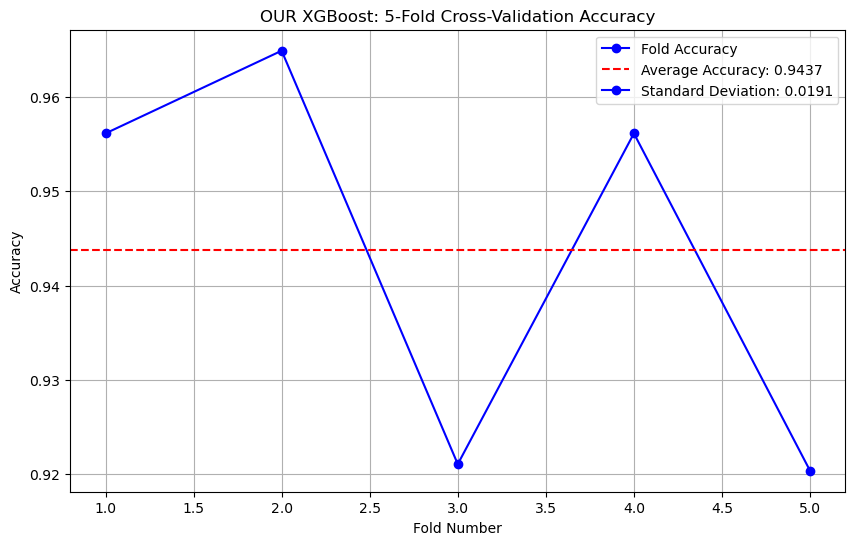

In [60]:
import matplotlib.pyplot as plt

# Plot the accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {mean_accuracy:.4f}')
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [
    'Fold Accuracy',
    f'Average Accuracy: {mean_accuracy:.4f}',
    f'Standard Deviation: {std_deviation:.4f}'
]
plt.legend(handles=[handles[0], handles[1], handles[0]], labels=custom_labels, loc='upper right')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('OUR XGBoost: 5-Fold Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Implementing with imported XGBoost

In [61]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from a CSV file
data = np.genfromtxt('../data/breast+cancer+wisconsin+diagnostic/wdbc.data', delimiter=',', dtype=str)

# Extract features and convert them to float for numerical operations
X = data[:, 2:].astype(float)  # Features start from the 3rd column (index 2)

# Convert labels from 'M' (Malignant) and 'B' (Benign) to binary (1 and 0)
y = np.where(data[:, 1] == 'M', 1, 0)

# Normalize the features by subtracting the mean and dividing by the standard deviation
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model with log loss as the evaluation metric
model = xgb.XGBClassifier(n_estimators=5, max_depth=5, learning_rate=0.3, tree_method='exact', eval_metric='logloss')

# Fits the XGBoost model to the training data.
model.fit(X_train, y_train)

# Retrieve and print model parameters for reference
params = model.get_params()
print(params)
n_estimators = params['n_estimators']
max_depth = params['max_depth']
learning_rate = params['learning_rate']

print("Number of estimators:", n_estimators)
print("Max depth:", max_depth)
print("Learning rate:", learning_rate)

# Retrieve the trained booster (underlying model) from XGBoost
booster = model.get_booster()

# Iterate over each tree in the model and print its structure
for i, tree in enumerate(booster.get_dump()):
    print(f"Tree {i + 1} structure:\n{tree}\n")

# Make predictions on the test data
y_pred_s = model.predict(X_test)

# Compute and print the accuracy score
accuracy_s = accuracy_score(y_test, y_pred_s)
print("Model Accuracy:", accuracy_s)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 5, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'exact', 'validate_parameters': None, 'verbosity': None}
Number of estimators: 5
Max depth: 5
Learning rate: 0.3
Tree 1 structure:
0:[f7<0.0608958304] yes=1

#### K-Fold Cross Validation

In [63]:
from sklearn.model_selection import KFold

# Define 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy for each fold
accuracy_scores = []

# Perform 5-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create an XGBoost model with log loss as the evaluation metric
    model = xgb.XGBClassifier(n_estimators=5, max_depth=5, tree_method='exact', eval_metric='logloss')
    
    # Fits the XGBoost model to the training data.
    model.fit(X_train, y_train)
    
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    print(f'Fold {fold} Accuracy: {accuracy:.4f}')

# Calculate the average accuracy across all folds
mean_accuracy_s = np.mean(accuracy_scores)
std_deviation_s = np.std(accuracy_scores)

# Print the results
print(f'Average Accuracy: {mean_accuracy_s:.4f}')
print(f'Standard Deviation: {std_deviation_s:.4f}')

Fold 1 Accuracy: 0.9737
Fold 2 Accuracy: 0.9737
Fold 3 Accuracy: 0.9211
Fold 4 Accuracy: 0.9386
Fold 5 Accuracy: 0.9646
Average Accuracy: 0.9543
Standard Deviation: 0.0210


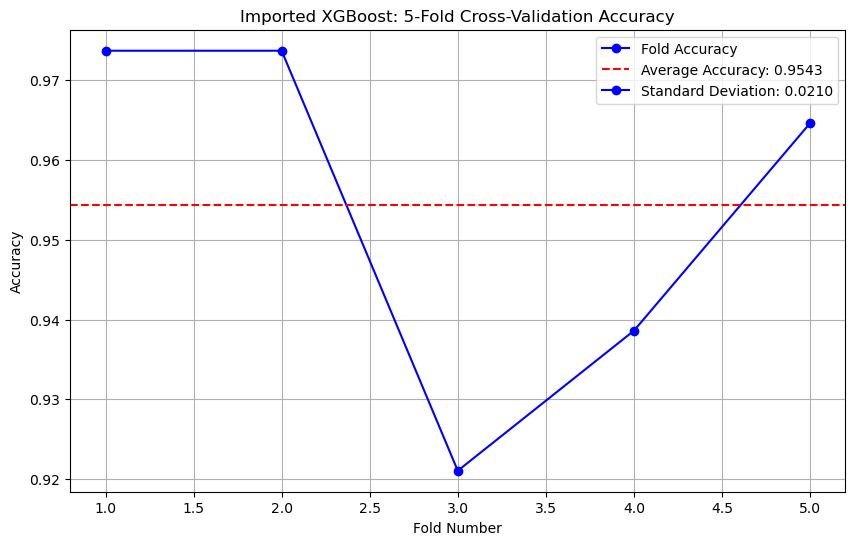

In [64]:
# Plot the accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy_s, color='r', linestyle='--', label=f'Average Accuracy: {mean_accuracy_s:.4f}')
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [
    'Fold Accuracy',
    f'Average Accuracy: {mean_accuracy_s:.4f}',
    f'Standard Deviation: {std_deviation_s:.4f}'
]
plt.legend(handles=[handles[0], handles[1], handles[0]], labels=custom_labels, loc='upper right')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Imported XGBoost: 5-Fold Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Results 1

From the comparison of the two figures, it can be seen that under the 5-fold experiment, our average accuracy is 0.52% higher than the previous work. This shows that we successfully reproduced the previous work.

### Customer Churn Prediction

This work uses XGBoost to predict customer retention based on information such as credit score, age, and income. The dataset used is Churn_Predictions_Personal (Ezzeldean, 2024). This dataset includes the following features:

| **Feature**        | **Description**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| **RowNumber**        | The row number in the dataset (used as an index).                               |
| **CustomerId**       | A unique identifier for each customer.                                          |
| **Surname**          | The last name of the customer.                                                  |
| **CreditScore**      | The credit score of the customer.                                               |
| **Geography**        | The location or country of the customer.                                        |
| **Gender**           | The gender of the customer (e.g., Male, Female).                                |
| **Age**              | The age of the customer.                                                        |
| **Tenure**           | The number of years the customer has been with the provider.                    |
| **Balance**          | The account balance of the customer.                                            |
| **NumOfProducts**    | The number of products the customer has with the provider.                      |
| **HasCrCard**        | Whether the customer has a credit card (1 = Yes, 0 = No).                       |
| **IsActiveMember**   | Whether the customer is an active member (1 = Yes, 0 = No).                     |
| **EstimatedSalary**  | The estimated salary of the customer.                                           |
| **Exited**           | Whether the customer exited the bank (1 = Yes, 0 = No).                         |

To facilitate result comparison, we made the following improvements:

- Remove the RowNumber, CustomerId, and Surname columns as the irrelevant columns.
- Encode the Gender and Geography features with the LabelEncoder
- Set the number of decision trees used by XGBoost to 5, the maximum depth of the trees to 5, and the learning rate to 0.3.

We split the dataset into 20% training and 80% testing sets, using 5-fold cross-validation to evaluate the accuracy of our model and the previous work's model.

#### Implementing with OUR XGBoost

In [65]:
from sklearn.preprocessing import LabelEncoder
# Load the Customer dataset
data = pd.read_csv('../data/Customer/Churn_Predictions.csv')
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

# Create a sample dataframe with categorical data
Genderr = pd.DataFrame({'Gender': ['Male', 'Female']})
Geographyy = pd.DataFrame({'Geography': ['France', 'Germany','Spain']})  

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

# Data pre-processing
X = data.drop('Exited', axis=1)
y = data['Exited']
X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the XGBoost model we implemented earlier and train it
model = XGBoost(num_trees=5, max_depth=5, learning_rate=0.3)
model.train(X_train, y_train, detailed='true')

# Generates predictions on the test data.
predictions = model.predict(X_test)

# Convert predictions to binary labels (0 or 1) using a threshold of 0.5
predictions = np.where(predictions >= 0.5, 1, 0)

# Calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)
print("Model Accuracy:", accuracy)

Tree 1:
0:[f3<43.000000] yes=1,no=2,missing=2
	1:[f6<2.000000] yes=3,no=4,missing=4
		3:[f3<38.000000] yes=7,no=8,missing=8
			7:[f1<0.000000] yes=13,no=14,missing=14
				13:leaf=-0.000000
				14:[f1<0.000000] yes=23,no=24,missing=24
					23:leaf=-0.000000
					24:leaf=0.132921
			8:[f8<1.000000] yes=15,no=16,missing=16
				15:[f1<0.000000] yes=25,no=26,missing=26
					25:leaf=-0.000000
					26:leaf=0.332530
				16:[f0<592.000000] yes=27,no=28,missing=28
					27:leaf=0.284091
					28:leaf=0.138889
		4:[f6<2.500000] yes=9,no=10,missing=10
			9:[f5<0.000000] yes=17,no=18,missing=18
				17:leaf=-0.000000
				18:[f5<0.000000] yes=29,no=30,missing=30
					29:leaf=-0.000000
					30:leaf=0.044476
			10:[f5<57003.365000] yes=19,no=20,missing=20
				19:[f9<131358.235000] yes=31,no=32,missing=32
					31:leaf=0.393939
					32:leaf=0.857143
				20:[f9<188544.700000] yes=33,no=34,missing=34
					33:leaf=0.959459
					34:leaf=0.250000
	2:[f8<0.000000] yes=5,no=6,missing=6
		5:leaf=-0.000000
		6:[f8<

#### K-Fold Cross Validation

In [66]:
from sklearn.model_selection import KFold

# Define 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy for each fold
accuracy_scores = []
# Perform 5-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test sets for this fold    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Initialize and train the XGBoost model on the training data
    model_x = XGBoost(num_trees=5, max_depth=5, learning_rate=0.3)
    model_x.train(X_train, y_train, detailed=False)
    
    # Generate predictions on the test data
    y_prob = model.predict(X_test)
    
    # Convert predictions to binary labels (0 or 1) using a threshold of 0.5
    predictions = np.where(y_prob >= 0.5, 1, 0)
    
    # Calculate accuracy for this fold
    accuracy = np.mean(predictions == y_test)
    accuracy_scores.append(accuracy)
    print(f'Fold {fold} Accuracy: {accuracy:.4f}')

# Calculate the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
std_deviation = np.std(accuracy_scores)

# Print the results
print(f'Average Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation: {std_deviation:.4f}')

Fold 1 Accuracy: 0.8530
Fold 2 Accuracy: 0.8515
Fold 3 Accuracy: 0.8465
Fold 4 Accuracy: 0.8545
Fold 5 Accuracy: 0.8530
Average Accuracy: 0.8517
Standard Deviation: 0.0028


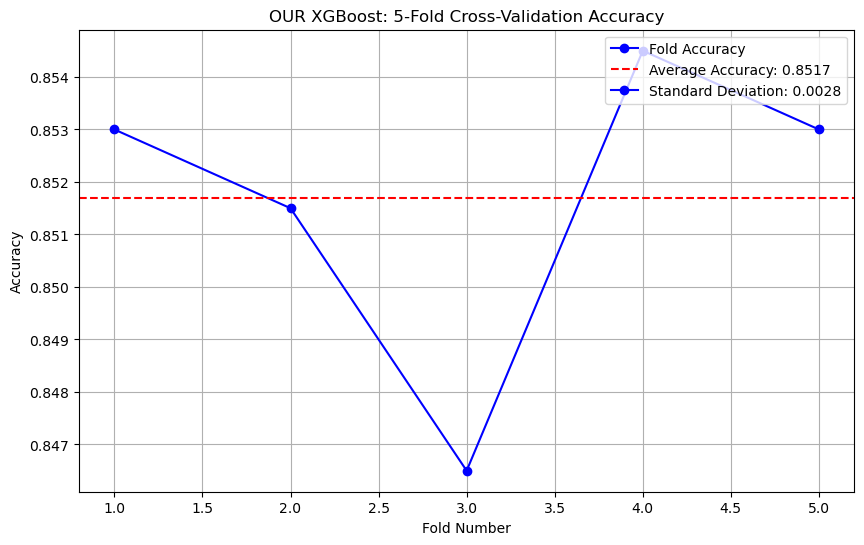

In [67]:
# Plot the accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy, color='r', linestyle='--', label=f'Average Accuracy: {mean_accuracy:.4f}')
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [
    'Fold Accuracy',
    f'Average Accuracy: {mean_accuracy:.4f}',
    f'Standard Deviation: {std_deviation:.4f}'
]
plt.legend(handles=[handles[0], handles[1], handles[0]], labels=custom_labels, loc='upper right')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('OUR XGBoost: 5-Fold Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Implementing with imported XGBoost

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier(n_estimators=5, max_depth=5, learning_rate=0.3, tree_method='exact', eval_metric='logloss')
model.fit(X_train, y_train)
# Retrieve and print model parameters for reference
params = model.get_params()
print(params)
n_estimators = params['n_estimators']
max_depth = params['max_depth']
learning_rate = params['learning_rate']

print("Number of estimators:", n_estimators)
print("Max depth:", max_depth)
print("Learning rate:", learning_rate)

# Retrieve the trained booster (underlying model) from XGBoost
booster = model.get_booster()

# Iterate over each tree in the model and print its structure
for i, tree in enumerate(booster.get_dump()):
    print(f"Tree {i + 1} structure:\n{tree}\n")

# Make predictions on the test data
y_pred_s = model.predict(X_test)

# Compute and print the accuracy score
accuracy_s = accuracy_score(y_test, y_pred_s)
print("Model Accuracy:", accuracy_s)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 5, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'exact', 'validate_parameters': None, 'verbosity': None}
Number of estimators: 5
Max depth: 5
Learning rate: 0.3
Tree 1 structure:
0:[f3<44.5] yes=1,no=2,mi

#### K-Fold Cross Validation

In [73]:
from sklearn.model_selection import KFold

# Define 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy for each fold
accuracy_scores = []

# Perform 5-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create an XGBoost model with log loss as the evaluation metric
    model = xgb.XGBClassifier(n_estimators=5, max_depth=5, tree_method='exact', eval_metric='logloss')
    
    # Fits the XGBoost model to the training data.
    model.fit(X_train, y_train)
    
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    print(f'Fold {fold} Accuracy: {accuracy:.4f}')

# Calculate the average accuracy across all folds
mean_accuracy_s = np.mean(accuracy_scores)
std_deviation_s = np.std(accuracy_scores)

# Print the results
print(f'Average Accuracy: {mean_accuracy_s:.4f}')
print(f'Standard Deviation: {std_deviation_s:.4f}')

Fold 1 Accuracy: 0.8605
Fold 2 Accuracy: 0.8610
Fold 3 Accuracy: 0.8505
Fold 4 Accuracy: 0.8620
Fold 5 Accuracy: 0.8530
Average Accuracy: 0.8574
Standard Deviation: 0.0047


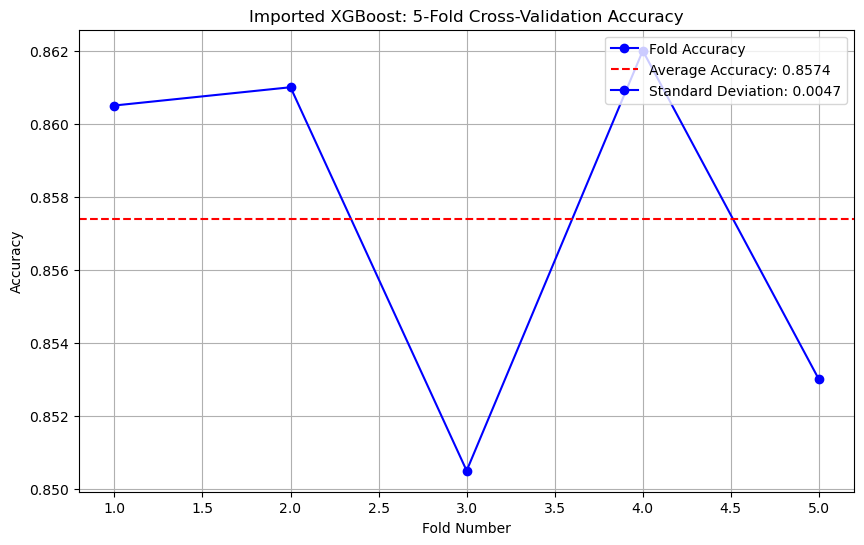

In [74]:
# Plot the accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy_s, color='r', linestyle='--', label=f'Average Accuracy: {mean_accuracy_s:.4f}')
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [
    'Fold Accuracy',
    f'Average Accuracy: {mean_accuracy_s:.4f}',
    f'Standard Deviation: {std_deviation_s:.4f}'
]
plt.legend(handles=[handles[0], handles[1], handles[0]], labels=custom_labels, loc='upper right')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Imported XGBoost: 5-Fold Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Results 2

From the comparison of the two figures, it can be seen that under the 5-fold experiment, our average accuracy is only 0.2% lower than the previous work. This shows that we successfully reproduced the previous work.

### Titanic Survival Prediction

This work uses XGBoost to predict which passengers would survive the Titanic shipwreck. The dataset used is Titanic - Machine Learning from Disaster (Kaggle, 2024). Below are the features included in the dataset:

| **Feature**   | **Description**                                       |
|---------------|-------------------------------------------------------|
| **PassengerId** | Unique identifier for each Passenger.                 |
| **Survival**    | Survival status (0 = No, 1 = Yes).                    |
| **Pclass**      | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).             |
| **Sex**         | Sex of the passenger.                                 |
| **Age**         | Age of the passenger in years.                        |
| **Sibsp**       | Number of siblings/spouses aboard the Titanic.        |
| **Parch**       | Number of parents/children aboard the Titanic.        |
| **Ticket**      | Ticket number.                                        |
| **Fare**        | Passenger fare.                                       |
| **Cabin**       | Cabin number.                                         |
| **Embarked**    | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). |

To facilitate result comparison, we made the following improvements:

- Remove the Name, PassengerId, Ticket columns as the irrelevant columns.
- Count the null values in the Cabin and Age columns and set the number of null values into a new feature: 0 means no null values, 1 means one null value, and 2 means all values are nulls.
- Extract the first letter of the Cabin code and map it to a number.
- Fill the missing cells in Fare with the average ticket price of third-class passengers.
- Fill the missing cells in Embarked with the Embarkation Southampton.
- Convert the 'Sex', 'Nulls', 'Cabin_mapped', 'Embarked' columns into one-hot encodings.
- Set the number of decision trees used by XGBoost to 5, the maximum depth of the trees to 5, and the learning rate to 0.3.

We split the dataset into 20% training and 80% testing sets, using 5-fold cross-validation to evaluate the accuracy of our model and the previous work's model.

#### Implementing with OUR XGBoost

In [51]:
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('../data/Titanic/train.csv')
test = pd.read_csv('../data/Titanic/test.csv')

# Concatenate training set and test set
X_full = pd.concat([train.drop('Survived', axis = 1), test], axis = 0)

# Clean X_full
X_full.drop('PassengerId', axis = 1, inplace=True)
X_full['Nulls'] = X_full.Cabin.isnull().astype('int') + X_full.Age.isnull().astype('int')

# Divide the cabin category by simply extracting the first letter
X_full['Cabin_mapped'] = X_full['Cabin'].astype(str).str[0]
cabin_dict = {k:i for i, k in enumerate(X_full.Cabin_mapped.unique())} 

# Transform 'Age' and 'Cabin'
X_full.loc[:, 'Cabin_mapped'] = X_full.loc[:, 'Cabin_mapped'].map(cabin_dict)
X_full.drop(['Age', 'Cabin'], inplace = True, axis = 1)

# Assume people with missing fare paid the average price
fare_mean = X_full[X_full.Pclass == 3].Fare.mean()
X_full['Fare'].fillna(fare_mean, inplace = True)
X_full['Embarked'].fillna('S', inplace = True)

# Fit and transform the categorical data
X_full.drop(['Name', 'Ticket'], axis = 1, inplace = True)
X_dummies = pd.get_dummies(X_full, columns = ['Sex', 'Nulls', 'Cabin_mapped', 'Embarked'], drop_first= True)

# Split and construct desired dataset
X = X_dummies[:len(train)]; new_X = X_dummies[len(train):]
y = train.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = XGBoost(num_trees=5, max_depth=5, learning_rate=0.3)

# Trains the XGBoost model on the training data.
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test
model.train(X_train, y_train, detailed='true')

# Generates predictions on the test data.
predictions = model.predict(X_test)

# Convert predictions to binary labels (0 or 1) using a threshold of 0.5
predictions = np.where(predictions >= 0.5, 1, 0)

# Calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)
print("Model Accuracy:", accuracy)

Tree 1:
0:[f4<0.500000] yes=1,no=2,missing=2
	1:[f0<3.000000] yes=3,no=4,missing=4
		3:[f7<1.000000] yes=7,no=8,missing=8
			7:[f5<1.000000] yes=13,no=14,missing=14
				13:[f0<1.000000] yes=23,no=24,missing=24
					23:leaf=-0.000000
					24:leaf=1.000000
				14:[f16<1.000000] yes=25,no=26,missing=26
					25:leaf=1.000000
					26:leaf=0.959184
			8:[f2<2.000000] yes=15,no=16,missing=16
				15:[f3<39.108350] yes=27,no=28,missing=28
					27:leaf=0.500000
					28:leaf=1.000000
				16:[f0<1.000000] yes=29,no=30,missing=30
					29:leaf=-0.000000
					30:leaf=0.600000
		4:[f3<23.350000] yes=9,no=10,missing=10
			9:[f2<0.000000] yes=17,no=18,missing=18
				17:leaf=-0.000000
				18:[f2<0.000000] yes=31,no=32,missing=32
					31:leaf=-0.000000
					32:leaf=0.585106
			10:[f0<3.000000] yes=19,no=20,missing=20
				19:leaf=-0.000000
				20:[f0<3.000000] yes=33,no=34,missing=34
					33:leaf=-0.000000
					34:leaf=0.047619
	2:[f0<1.000000] yes=5,no=6,missing=6
		5:leaf=-0.000000
		6:[f0<1.000000] yes=

#### K-Fold Cross Validation

In [52]:
from sklearn.model_selection import KFold
# Define 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy for each fold
accuracy_scores = []
#Perform 5-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, pd.Series) else y
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Create an XGBoost model with log loss as the evaluation metric
    model_x = XGBoost(num_trees=5, max_depth=5, learning_rate=0.3)
    model_x.train(X_train, y_train, detailed=False)
    # Generate predictions
    y_prob = model.predict(X_test)
    predictions = np.where(y_prob >= 0.5, 1, 0)
    
    # Calculate accuracy for this fold
    accuracy = np.mean(predictions == y_test)
    accuracy_scores.append(accuracy)
    print(f'Fold {fold} Accuracy: {accuracy:.8f}')

# Calculate the average accuracy across all folds
mean_accuracy_s = np.mean(accuracy_scores)
std_deviation_s = np.std(accuracy_scores)

# Print the results
print(f'Average Accuracy: {mean_accuracy_s:.4f}')
print(f'Standard Deviation: {std_deviation_s:.4f}')

Fold 1 Accuracy: 0.76536313
Fold 2 Accuracy: 0.77528090
Fold 3 Accuracy: 0.80337079
Fold 4 Accuracy: 0.78089888
Fold 5 Accuracy: 0.80337079
Average Accuracy: 0.7857
Standard Deviation: 0.0153


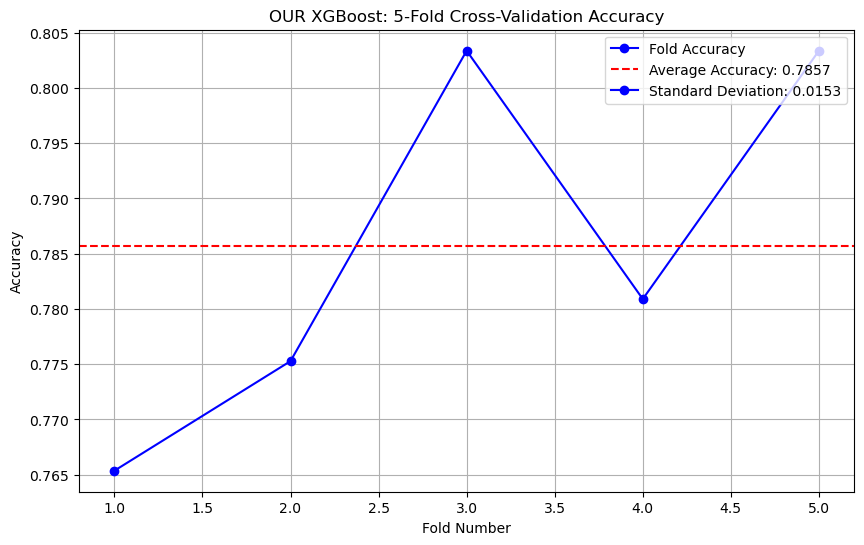

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy_s, color='r', linestyle='--', label=f'Average Accuracy: {mean_accuracy_s:.4f}')
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [
    'Fold Accuracy',
    f'Average Accuracy: {mean_accuracy_s:.4f}',
    f'Standard Deviation: {std_deviation_s:.4f}'
]
plt.legend(handles=[handles[0], handles[1], handles[0]], labels=custom_labels, loc='upper right')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('OUR XGBoost: 5-Fold Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Implementing with imported XGBoost

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = xgb.XGBClassifier(n_estimators=5, max_depth=5, learning_rate=0.3, tree_method='exact', eval_metric='logloss')
model.fit(X_train, y_train)
params = model.get_params()
print(params)
n_estimators = params['n_estimators']
max_depth = params['max_depth']
learning_rate = params['learning_rate']

print("Number of estimators:", n_estimators)
print("Max depth:", max_depth)
print("Learning rate:", learning_rate)

# Retrieve the trained booster (underlying model) from XGBoost
booster = model.get_booster()

# Iterate over each tree in the model and print its structure
for i, tree in enumerate(booster.get_dump()):
    print(f"Tree {i + 1} structure:\n{tree}\n")

# Make predictions on the test data
y_pred_s = model.predict(X_test)

# Compute and print the accuracy score
accuracy_s = accuracy_score(y_test, y_pred_s)
print("Model Accuracy:", accuracy_s)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 5, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'exact', 'validate_parameters': None, 'verbosity': None}
Number of estimators: 5
Max depth: 5
Learning rate: 0.3
Tree 1 structure:
0:[f4<0.5] yes=1,no=2,mis

#### K-Fold Cross Validation

In [56]:
from sklearn.model_selection import KFold

# Define 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store accuracy for each fold
accuracy_scores = []

# Perform 5-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create an XGBoost model with log loss as the evaluation metric
    model = xgb.XGBClassifier(n_estimators=5, max_depth=5, tree_method='exact', eval_metric='logloss')
    
    # Fits the XGBoost model to the training data.
    model.fit(X_train, y_train)
    
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    print(f'Fold {fold} Accuracy: {accuracy:.4f}')

# Calculate the average accuracy across all folds
mean_accuracy_s = np.mean(accuracy_scores)
std_deviation_s = np.std(accuracy_scores)

# Print the results
print(f'Average Accuracy: {mean_accuracy_s:.4f}')
print(f'Standard Deviation: {std_deviation_s:.4f}')

Fold 1 Accuracy: 0.8156
Fold 2 Accuracy: 0.7921
Fold 3 Accuracy: 0.8483
Fold 4 Accuracy: 0.7921
Fold 5 Accuracy: 0.8202
Average Accuracy: 0.8137
Standard Deviation: 0.0209


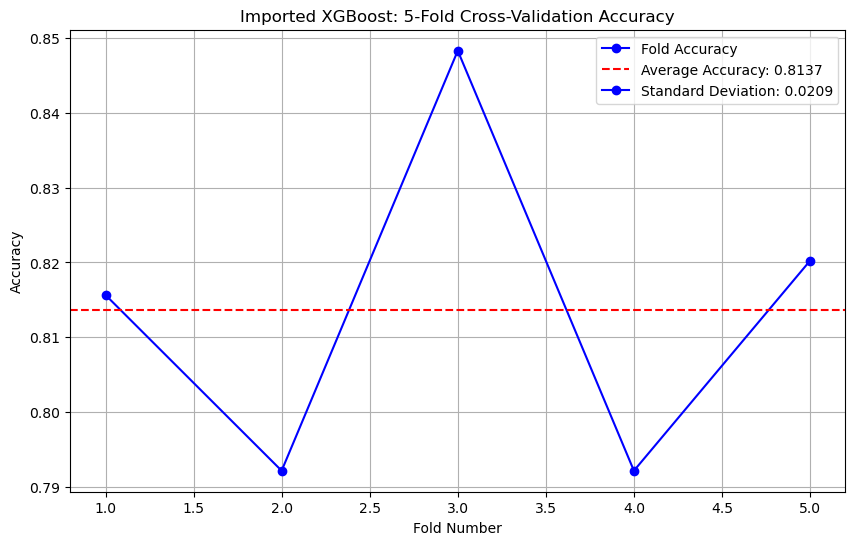

In [57]:
# Plot the accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Fold Accuracy')
plt.axhline(mean_accuracy_s, color='r', linestyle='--', label=f'Average Accuracy: {mean_accuracy_s:.4f}')
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [
    'Fold Accuracy',
    f'Average Accuracy: {mean_accuracy_s:.4f}',
    f'Standard Deviation: {std_deviation_s:.4f}'
]
plt.legend(handles=[handles[0], handles[1], handles[0]], labels=custom_labels, loc='upper right')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Imported XGBoost: 5-Fold Cross-Validation Accuracy')
plt.grid(True)
plt.show()

#### Results 3

From the comparison of the two figures, it can be seen that under the 5-fold experiment, our average accuracy is 2.8% lower than the previous work. This shows that we successfully reproduced the previous work.

# Citation and Reference

1. Chen, T. & Guestrin, C. (2016) 'XGBoost: A scalable tree boosting system', *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*. ACM. Available at: https://doi.org/10.1145/2939672.2939785 (Accessed: 28 November 2024).

2. Friedman, J.H. (2001) 'Greedy function approximation: A gradient boosting machine', *Annals of Statistics*, 29(5), pp. 1189–1232. Available at: https://doi.org/10.1214/aos/1013203451 (Accessed: 28 November 2024).

3. Hastie, T., Tibshirani, R. & Friedman, J. (2009) *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. 2nd edn. Springer Science & Business Media. Available at: https://doi.org/10.1007/978-0-387-84858-7 (Accessed: 28 November 2024).

4. Bishop, C.M. (2006) *Pattern Recognition and Machine Learning*. 1st edn. Springer. Available at: https://doi.org/10.1007/978-0-387-45528-0 (Accessed: 28 November 2024).

5. Quinlan, J.R. (1996) 'Bagging, boosting, and C4.5', *Proceedings of the National Conference on Artificial Intelligence*, pp. 725–730. Available at: https://www.aaai.org/Papers/AAAI/1996/AAAI96-108.pdf (Accessed: 28 November 2024).

6. Breiman, L. (1996) 'Bagging predictors', *Machine Learning*, 24(2), pp. 123–140. Available at: https://doi.org/10.1007/BF00058655 (Accessed: 28 November 2024).

7. Chen, T., He, T., Benesty, M., Khotilovich, V. & Tang, Y. (2020) *XGBoost: Extreme Gradient Boosting*. R Package version 1.4.1. Available at: https://xgboost.readthedocs.io/ (Accessed: 28 November 2024).

8. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. & Duchesnay, E. (2011) 'Scikit-learn: Machine learning in Python', *Journal of Machine Learning Research*, 12, pp. 2825–2830. Available at: http://jmlr.org/papers/v12/pedregosa11a.html (Accessed: 28 November 2024).

9. Wolberg, W., Mangasarian, O., Street, N. & Street, W. (1993) 'Breast Cancer Wisconsin (Diagnostic) [Dataset]', *UCI Machine Learning Repository*. Available at: https://doi.org/10.24432/C5DW2B (Accessed: 4 December 2024).

10. Ezzeldean, M. (2024) 'Customer Exited Prediction | XGBoost'. *Kaggle*. Available at: https://www.kaggle.com/code/mohammedezzeldean/customer-exited-prediction-xgboost/notebook (Accessed: 4 December 2024).

11. Kaggle (2024) 'Titanic - Machine Learning from Disaster', *Kaggle*. Available at: https://www.kaggle.com/c/titanic/overview (Accessed: 4 December 2024).
